## Read and Parse Data

### Load and format data

In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [17]:
import pandas as pd

df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSdLYZtOd12U14IGzypjzIX1q69OMuhW_AsTaOgdZc7UgqJSvuBIC8V85kZeQHnqiCxaB7Ezsru_ri7/pub?gid=198200420&single=true&output=csv")
df

,quarter,gross_profit_x,net_income_x,pre_tax_income,operating_income,revenue_x,net_profit_margin,operating_margin,gross_margin_x,ebitda,...,dividend,debt_to_equity,cash_from_operations,cash_from_investing,cash_from_financing,free_cash_flow,gross_profit_y,gross_margin_y,net_debt,cash_flow_per_share
0,2013Q3,3.768000e+09,1.230000e+09,1.716000e+09,1.739000e+09,7.916000e+09,0.155382,0.219682,0.475998,1.739000e+09,...,NaN,19.357,1151.0,38.0,-1916.0,815.0,7911.0,0.999368,349992.964,0.000001
1,2013Q4,3.593000e+09,1.103000e+09,1.558000e+09,1.579000e+09,7.569000e+09,0.145726,0.208614,0.474699,1.579000e+09,...,2.54,24.103,1993.0,-154.0,-1603.0,1492.0,7567.0,0.999736,429263.644,0.000002
2,2014Q1,3.800000e+09,1.207000e+09,1.688000e+09,1.716000e+09,7.831000e+09,0.154131,0.219129,0.485251,2.066000e+09,...,3.42,24.554,1092.0,-287.0,-1399.0,802.0,7822.0,0.998851,437291.896,0.000001
3,2014Q2,3.950000e+09,1.267000e+09,1.820000e+09,1.856000e+09,8.134000e+09,0.155766,0.228178,0.485616,1.856000e+09,...,3.42,29.827,1640.0,-292.0,-1185.0,1334.0,8127.0,0.999139,529283.642,0.000002
4,2014Q3,3.932000e+09,1.303000e+09,1.880000e+09,1.901000e+09,8.137000e+09,0.160133,0.233624,0.483225,1.901000e+09,...,3.42,32.241,1711.0,1.0,-1889.0,1420.0,8136.0,0.999877,519801.646,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,2023Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.42,-136.170,477.0,-30.0,-223.0,420.0,1726.0,1.010539,1114576.300,NaN
19964,2023Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,70.395,-35.0,-14.0,43.0,-49.0,960.0,1.004184,212039.135,NaN
19965,2023Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.96,40.960,337.6,-165.6,-196.0,188.8,1757.2,1.002053,512445.180,NaN
19966,2023Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.64,100.230,311.0,-148.0,-164.0,280.0,1190.0,1.000000,528860.450,NaN


In [18]:
import numpy as np

df = df[df['quarter'].notnull()].reset_index(drop = True)
df['eps_surprise'] = np.where(df['eps_normalized_consensus_mean'] == 0, df['eps_normalized_actual'], (df["eps_normalized_actual"] - df["eps_normalized_consensus_mean"])/df["eps_normalized_consensus_mean"])
df.drop(columns = ["eps_normalized_actual"], inplace = True)
df = df.sort_values(['symbol', 'quarter']).reset_index(drop=True)
df

,quarter,gross_profit_x,net_income_x,pre_tax_income,operating_income,revenue_x,net_profit_margin,operating_margin,gross_margin_x,ebitda,...,debt_to_equity,cash_from_operations,cash_from_investing,cash_from_financing,free_cash_flow,gross_profit_y,gross_margin_y,net_debt,cash_flow_per_share,eps_surprise
0,2013Q3,-7.200000e+08,221000000.0,-193000000.0,-280000000.0,-1.170000e+09,-0.188889,0.239316,0.615385,-280000000.0,...,51.030,377.0,-51.0,6.0,345.0,1717.0,0.999418,267222.670,1.000000e-06,0.066393
1,2013Q4,5.100000e+08,195000000.0,193000000.0,124000000.0,1.008000e+09,0.193452,0.123016,0.505952,220000000.0,...,49.477,194.0,-47.0,-68.0,149.0,1173.0,1.163690,266759.219,4.410000e-07,0.014322
2,2014Q1,4.850000e+08,139000000.0,167000000.0,94000000.0,9.880000e+08,0.140688,0.095142,0.490891,94000000.0,...,47.842,325.0,-55.0,-72.0,274.0,1181.0,1.195344,266352.618,8.130000e-07,-0.007786
3,2014Q2,5.020000e+08,147000000.0,190000000.0,131000000.0,1.009000e+09,0.145689,0.129832,0.497522,131000000.0,...,38.670,28.0,-70.0,-518.0,-24.0,1166.0,1.155600,215707.800,-7.100000e-08,0.057914
4,2014Q3,4.790000e+08,68000000.0,213000000.0,70000000.0,1.043000e+09,0.065197,0.067114,0.459252,70000000.0,...,52.103,164.0,-58.0,561.0,121.0,1742.0,0.965097,274136.312,3.580000e-07,-0.008328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,2022Q3,1.395000e+09,529000000.0,667000000.0,667000000.0,2.002000e+09,0.264236,0.333167,0.696803,782000000.0,...,111.750,526.0,-124.0,-529.0,372.0,2003.0,1.000500,518471.500,7.930000e-07,-0.020885
19964,2022Q4,1.387000e+09,461000000.0,592000000.0,592000000.0,2.040000e+09,0.225980,0.290196,0.679902,711000000.0,...,148.810,741.0,-438.0,780.0,571.0,2041.0,1.000490,651629.430,1.210000e-06,0.002581
19965,2023Q1,1.412000e+09,552000000.0,697000000.0,697000000.0,2.000000e+09,0.276000,0.348500,0.706000,817000000.0,...,146.050,549.0,-216.0,-1802.0,328.0,2001.0,1.000500,653801.550,7.060000e-07,0.045291
19966,2023Q2,1.573000e+09,671000000.0,872000000.0,872000000.0,2.180000e+09,0.307798,0.400000,0.721560,993000000.0,...,141.850,183.0,-80.0,-494.0,18.0,2181.0,1.000459,653771.850,3.890000e-08,0.080087


In [19]:
for col in ["Sector", "Industry Group", "Industry", "Sub-Industry"]:
    df[col] = df[col].astype('category')

# Select columns with 'float64' dtype
float64_cols = list(df.select_dtypes(include='float64'))

# The same code again calling the columns
df[float64_cols] = df[float64_cols].astype('float32')
df[float64_cols] = df[float64_cols].fillna(value=np.NAN)

In [20]:
df.groupby("symbol").get_group("GOOGL")[["quarter", "eps_normalized_consensus_mean"]]

,quarter,eps_normalized_consensus_mean
8210,2013Q3,0.26071
8211,2013Q4,0.30746
8212,2014Q1,0.32092
8213,2014Q2,0.31155
8214,2014Q3,0.32598
8215,2014Q4,0.35643
8216,2015Q1,0.33040
8217,2015Q2,0.33470
8218,2015Q3,0.36031
8219,2015Q4,0.40465


### Evaluate Average number of EPS Surprise Quarters per Company and Average consensus deviation

In [21]:
df.groupby('symbol')['eps_surprise'].size().values.mean()

39.69781312127237

In [22]:
(df["eps_normalized_consensus_high"]-df["eps_normalized_consensus_low"]).mean(skipna=True)

0.28621823

### Evaluate EPS Surprise per Categorical Embedding

<Axes: title={'center': 'eps_surprise'}, xlabel='Sector', ylabel='EPS Surprise'>

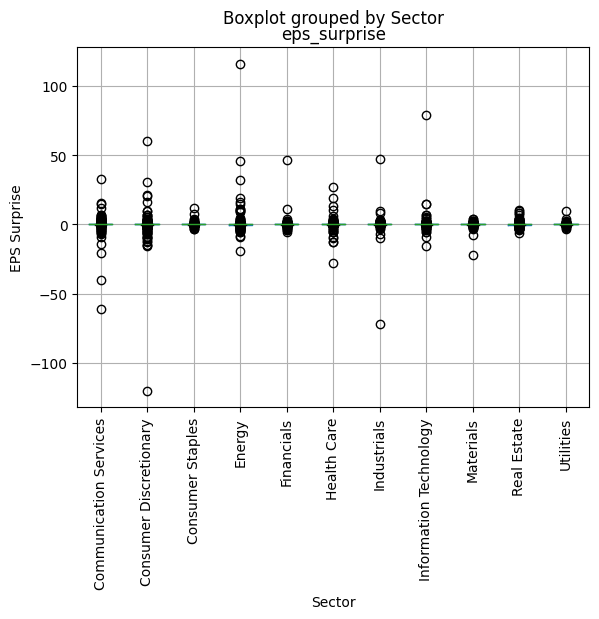

In [44]:
df.boxplot(column='eps_surprise', by='Sector', rot=90, ylabel='EPS Surprise')

<Axes: title={'center': 'Non-Null EPS Surprise Values by Sector'}, xlabel='Sector', ylabel='Number of EPS Surprise Rows'>

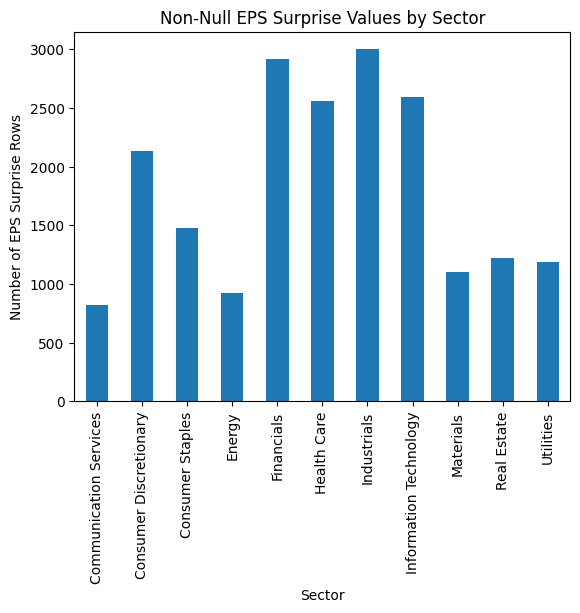

In [39]:
df.groupby('Sector')['eps_surprise'].count().plot(kind='bar', xlabel='Sector', ylabel='Number of EPS Surprise Rows', title='Non-Null EPS Surprise Values by Sector')

<Axes: title={'center': 'eps_surprise'}, xlabel='Industry Group', ylabel='EPS Surprise'>

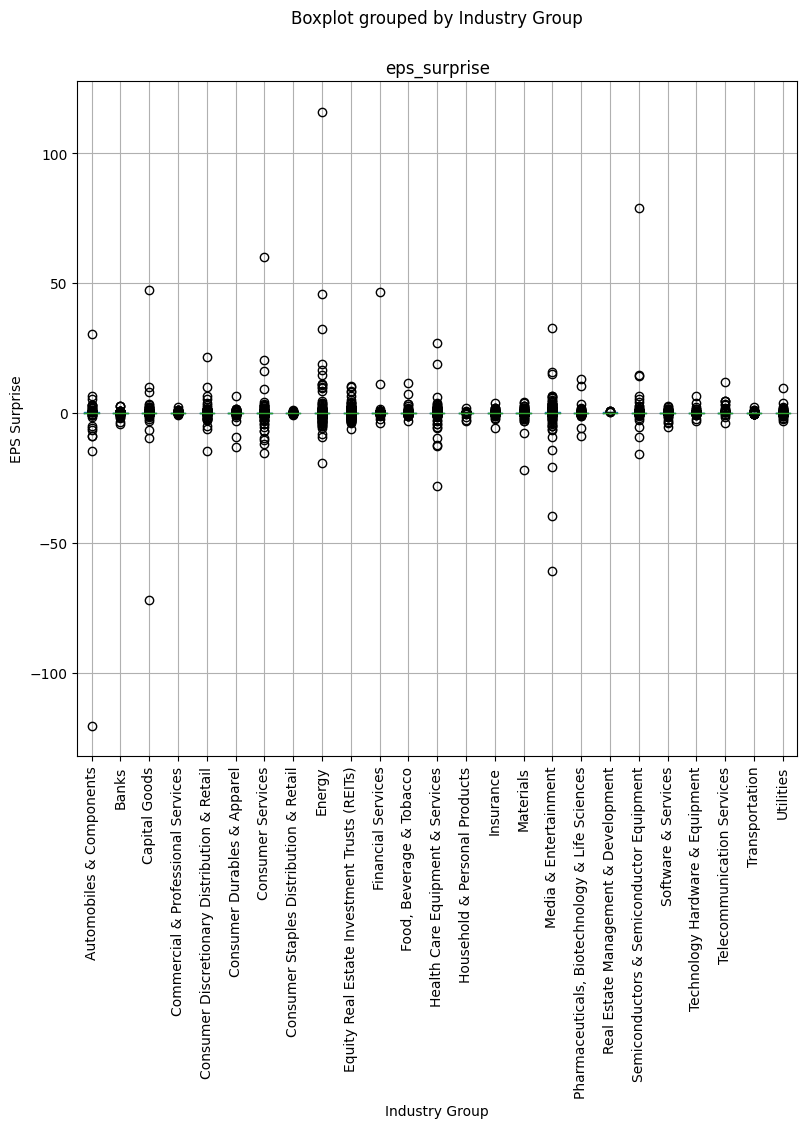

In [48]:
df.boxplot(column='eps_surprise', by='Industry Group', rot=90, figsize=(9,9),ylabel='EPS Surprise')

<Axes: title={'center': 'Non-Null EPS Surprise Values by Industry Group'}, xlabel='Industry Group', ylabel='Number of EPS Surprise Rows'>

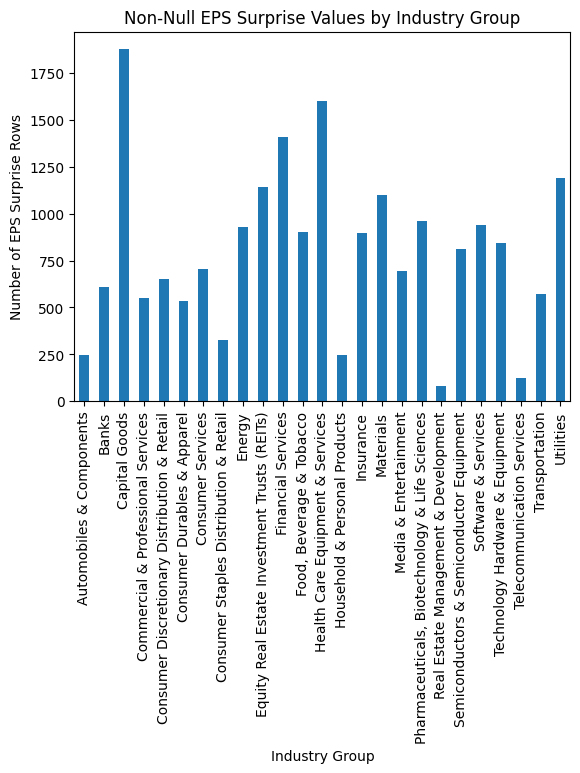

In [49]:
df.groupby('Industry Group')['eps_surprise'].count().plot(kind='bar', xlabel='Industry Group', ylabel='Number of EPS Surprise Rows', title='Non-Null EPS Surprise Values by Industry Group')

<Axes: title={'center': 'eps_surprise'}, xlabel='Industry', ylabel='EPS Surprise'>

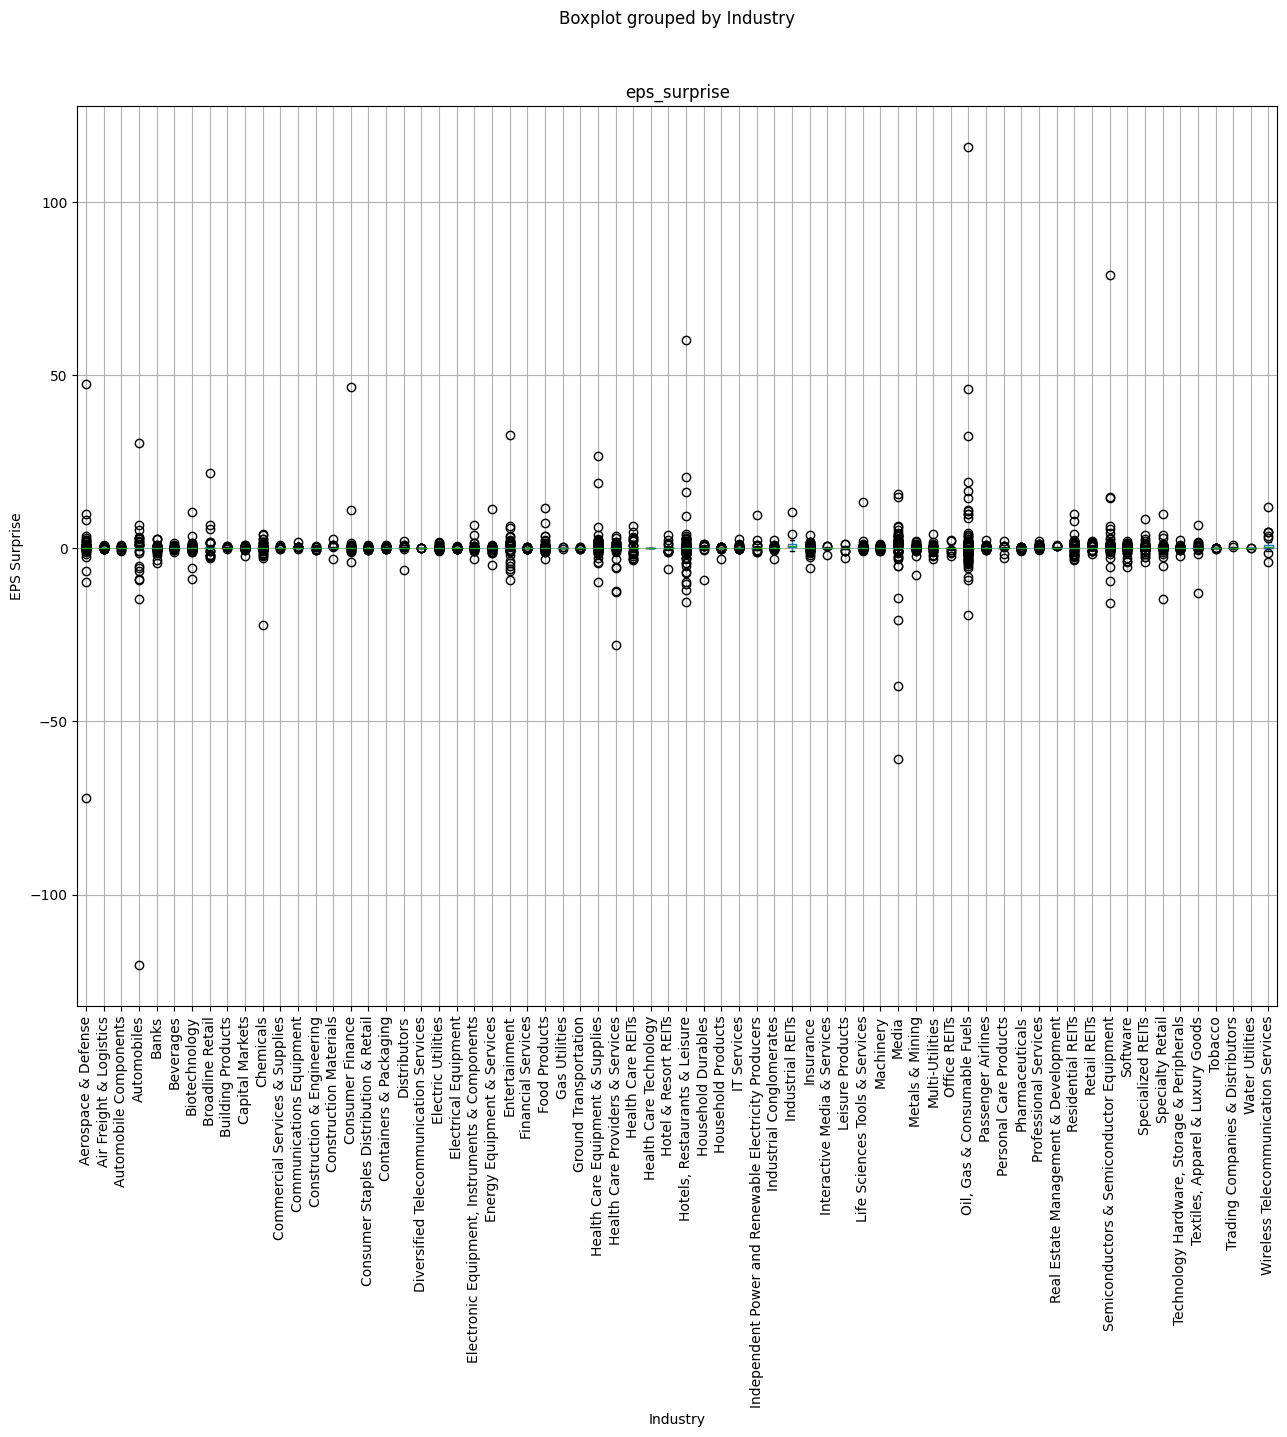

In [52]:
df.boxplot(column='eps_surprise', by='Industry', rot=90, figsize=(15,12),ylabel='EPS Surprise')

<Axes: title={'center': 'Non-Null EPS Surprise Values by Industry'}, xlabel='Industry', ylabel='Number of EPS Surprise Rows'>

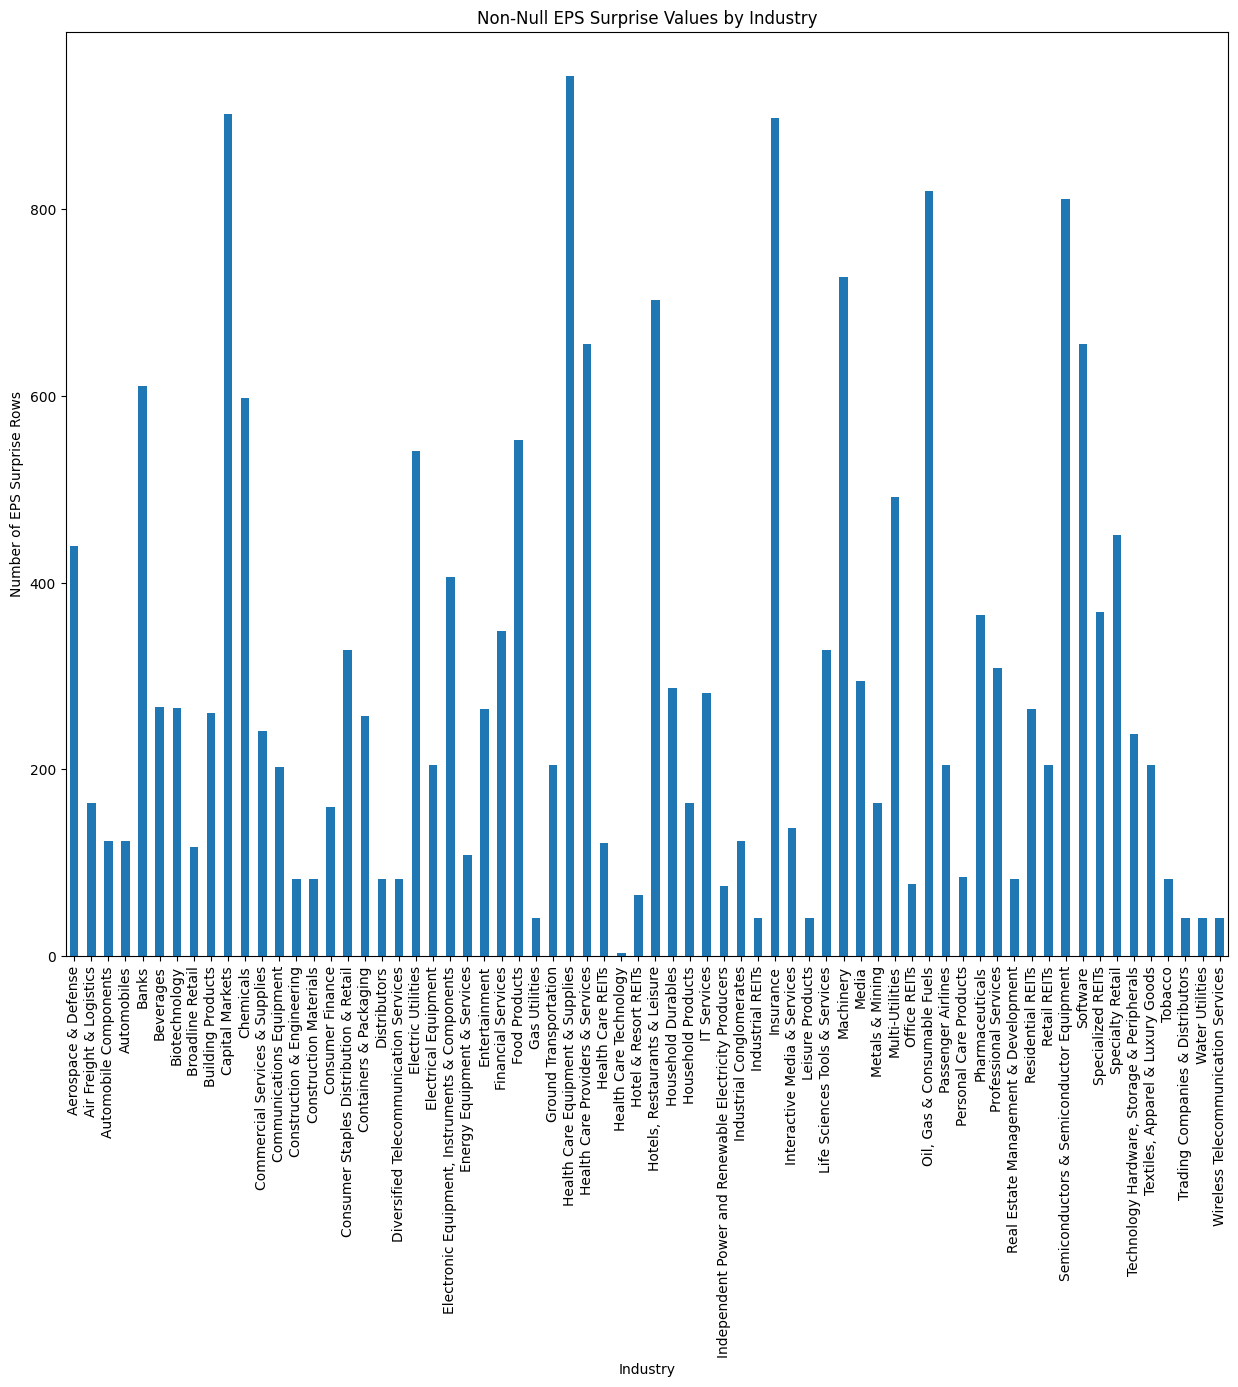

In [57]:
df.groupby('Industry')['eps_surprise'].count().plot(kind='bar', xlabel='Industry', ylabel='Number of EPS Surprise Rows', title='Non-Null EPS Surprise Values by Industry', figsize=(15,12))

### Standardize the columns to avoid exploding gradients

In [7]:

from sklearn.preprocessing import StandardScaler

# Select columns with float dtype from original_df
float_cols = list(df.select_dtypes(include='float'))

# remove eps_surprise column from the list
float_cols.remove('eps_surprise')

# define standard scaler
scaler = StandardScaler()

# transform data
df[float_cols] = scaler.fit_transform(df[float_cols])
df

,quarter,gross_profit_x,net_income_x,pre_tax_income,operating_income,revenue_x,net_profit_margin,operating_margin,gross_margin_x,ebitda,...,debt_to_equity,cash_from_operations,cash_from_investing,cash_from_financing,free_cash_flow,gross_profit_y,gross_margin_y,net_debt,cash_flow_per_share,eps_surprise
0,2013Q3,-0.591129,-0.236944,-0.487268,-0.573144,-0.609909,-0.057674,-0.003663,0.016152,-0.588885,...,-0.013068,-0.183514,0.159477,0.026209,-0.103017,-0.366667,-0.027648,-0.330073,-0.016208,0.066393
1,2013Q4,-0.411584,-0.253156,-0.291768,-0.362901,-0.426604,0.014847,-0.010833,-0.009307,-0.356453,...,-0.013412,-0.235426,0.160344,0.014149,-0.163035,-0.410267,0.434812,-0.330220,-0.016232,0.014322
2,2014Q1,-0.415233,-0.288074,-0.304936,-0.378513,-0.428287,0.004839,-0.012551,-0.012811,-0.415026,...,-0.013775,-0.198265,0.158610,0.013497,-0.124758,-0.409626,0.523923,-0.330349,-0.016216,-0.007786
3,2014Q2,-0.412752,-0.283086,-0.293287,-0.359258,-0.426520,0.005787,-0.010413,-0.011268,-0.397826,...,-0.015809,-0.282516,0.155360,-0.059190,-0.216010,-0.410828,0.412034,-0.346403,-0.016254,0.057914
4,2014Q3,-0.416109,-0.332346,-0.281638,-0.391003,-0.423658,-0.009480,-0.014279,-0.020172,-0.426183,...,-0.012830,-0.243936,0.157960,0.116661,-0.171609,-0.364663,-0.124268,-0.327882,-0.016236,-0.008328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,2022Q3,-0.282399,-0.044894,-0.051698,-0.080322,-0.342947,0.028273,0.002122,0.035094,-0.095198,...,0.000398,-0.141247,0.143658,-0.060983,-0.094749,-0.343745,-0.024603,-0.250430,-0.016217,-0.020885
19964,2022Q4,-0.283567,-0.087295,-0.089684,-0.119352,-0.339749,0.021017,-0.000527,0.031162,-0.128204,...,0.008617,-0.080257,0.075617,0.152353,-0.033813,-0.340700,-0.024629,-0.208220,-0.016199,0.002581
19965,2023Q1,-0.279918,-0.030553,-0.036504,-0.064710,-0.343115,0.030504,0.003067,0.037233,-0.078928,...,0.008004,-0.134722,0.123722,-0.268452,-0.108223,-0.343905,-0.024601,-0.207532,-0.016221,0.045291
19966,2023Q2,-0.256416,0.043648,0.052130,0.026361,-0.327966,0.036535,0.006242,0.040853,0.002888,...,0.007073,-0.238546,0.153193,-0.055279,-0.203149,-0.329479,-0.024718,-0.207541,-0.016249,0.080087


In [8]:
df.groupby('quarter').count()[["eps_surprise", "eps_normalized_consensus_mean"]]

,eps_surprise,eps_normalized_consensus_mean
quarter,,
2010Q4,1,1
2011Q1,1,1
2011Q2,1,1
2011Q3,1,1
2011Q4,1,1
2012Q1,1,1
2012Q2,1,1
2012Q3,1,1
2012Q4,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   quarter                          19968 non-null  object  
 1   gross_profit_x                   16148 non-null  float32 
 2   net_income_x                     18285 non-null  float32 
 3   pre_tax_income                   17088 non-null  float32 
 4   operating_income                 17861 non-null  float32 
 5   revenue_x                        17705 non-null  float32 
 6   net_profit_margin                17439 non-null  float32 
 7   operating_margin                 17137 non-null  float32 
 8   gross_margin_x                   16030 non-null  float32 
 9   ebitda                           17861 non-null  float32 
 10  Sector                           19968 non-null  category
 11  Industry Group                   19968 non-null  category
 12  Indu

### Shift columns down to act as causal predictors

In [ ]:
mask = ~(df.columns.isin(['quarter', 'symbol', 'eps_normalized_consensus_low','eps_normalized_consensus_mean', 'eps_normalized_consensus_high', 'eps_normalized_num_of_estimates', 'revenue_consensus_mean', 'ffo_consensus_mean', 'prev_60_day_return', 'eps_surprise', "Sector", "Industry Group", "Industry", "Sub-Industry"]))

cols_to_shift = df.columns[mask]
shifted_df = df.copy()
shifted_df[cols_to_shift] = shifted_df.groupby('symbol')[cols_to_shift].shift(1)
shifted_df = shifted_df.reset_index(drop = True)
# keep only rows with values in more than just the mask
shifted_df = shifted_df.dropna(how='all', subset = cols_to_shift).reset_index(drop=True)
shifted_df

,quarter,gross_profit_x,net_income_x,pre_tax_income,operating_income,revenue_x,net_profit_margin,operating_margin,gross_margin_x,ebitda,...,debt_to_equity,cash_from_operations,cash_from_investing,cash_from_financing,free_cash_flow,gross_profit_y,gross_margin_y,net_debt,cash_flow_per_share,eps_surprise
0,2013Q4,-0.591129,-0.236944,-0.487268,-0.573144,-0.609909,-0.057674,-0.003663,0.016152,-0.588885,...,-0.013068,-0.183514,0.159477,0.026209,-0.103017,-0.366667,-0.027648,-0.330073,-0.016208,0.014322
1,2014Q1,-0.411584,-0.253156,-0.291768,-0.362901,-0.426604,0.014847,-0.010833,-0.009307,-0.356453,...,-0.013412,-0.235426,0.160344,0.014149,-0.163035,-0.410267,0.434812,-0.330220,-0.016232,-0.007786
2,2014Q2,-0.415233,-0.288074,-0.304936,-0.378513,-0.428287,0.004839,-0.012551,-0.012811,-0.415026,...,-0.013775,-0.198265,0.158610,0.013497,-0.124758,-0.409626,0.523923,-0.330349,-0.016216,0.057914
3,2014Q3,-0.412752,-0.283086,-0.293287,-0.359258,-0.426520,0.005787,-0.010413,-0.011268,-0.397826,...,-0.015809,-0.282516,0.155360,-0.059190,-0.216010,-0.410828,0.412034,-0.346403,-0.016254,-0.008328
4,2014Q4,-0.416109,-0.332346,-0.281638,-0.391003,-0.423658,-0.009480,-0.014279,-0.020172,-0.426183,...,-0.012830,-0.243936,0.157960,0.116661,-0.171609,-0.364663,-0.124268,-0.327882,-0.016236,0.001882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19460,2022Q3,-0.277728,-0.044894,-0.050179,-0.078761,-0.338739,0.027051,0.001712,0.034772,-0.092874,...,0.000897,-0.195144,0.126539,-0.074184,-0.150480,-0.339818,-0.026009,-0.250114,-0.016234,-0.020885
19461,2022Q4,-0.282399,-0.044894,-0.051698,-0.080322,-0.342947,0.028273,0.002122,0.035094,-0.095198,...,0.000398,-0.141247,0.143658,-0.060983,-0.094749,-0.343745,-0.024603,-0.250430,-0.016217,0.002581
19462,2023Q1,-0.283567,-0.087295,-0.089684,-0.119352,-0.339749,0.021017,-0.000527,0.031162,-0.128204,...,0.008617,-0.080257,0.075617,0.152353,-0.033813,-0.340700,-0.024629,-0.208220,-0.016199,0.045291
19463,2023Q2,-0.279918,-0.030553,-0.036504,-0.064710,-0.343115,0.030504,0.003067,0.037233,-0.078928,...,0.008004,-0.134722,0.123722,-0.268452,-0.108223,-0.343905,-0.024601,-0.207532,-0.016221,0.080087


### Add imputation for missing values

In [ ]:
mask = ~(shifted_df.columns.isin(['quarter', 'symbol', 'eps_surprise', "Sector", "Industry Group", "Industry", "Sub-Industry"]))

for col in shifted_df.columns[mask]:
    shifted_df[f"{col}_non_missing"] = (shifted_df[col].notnull()).astype('float32')
    shifted_df = shifted_df.merge(shifted_df.groupby(['quarter'], as_index=True)[f"{col}_non_missing"].sum().transform('cumsum').astype('float32').to_frame(name=f"{col}_non_missing_total"), how = 'outer', left_on='quarter', right_index=True)
    shifted_df[col] = shifted_df[col].fillna(0)

shifted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19465 entries, 0 to 10615
Data columns (total 97 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   quarter                                            19465 non-null  object  
 1   gross_profit_x                                     19465 non-null  float32 
 2   net_income_x                                       19465 non-null  float32 
 3   pre_tax_income                                     19465 non-null  float32 
 4   operating_income                                   19465 non-null  float32 
 5   revenue_x                                          19465 non-null  float32 
 6   net_profit_margin                                  19465 non-null  float32 
 7   operating_margin                                   19465 non-null  float32 
 8   gross_margin_x                                     19465 non-null  float32 


In [ ]:
shifted_df[shifted_df["symbol"] == "A"][["quarter", "cash_flow_per_share", "cash_flow_per_share_non_missing", "cash_flow_per_share_non_missing_total"]].head()

,quarter,cash_flow_per_share,cash_flow_per_share_non_missing,cash_flow_per_share_non_missing_total
0,2013Q4,-0.016208,1.0,443.0
1,2014Q1,-0.016232,1.0,857.0
2,2014Q2,-0.016216,1.0,1288.0
3,2014Q3,-0.016254,1.0,1714.0
4,2014Q4,-0.016236,1.0,2146.0


## Parse into Gluonts dataset for estimator usage

### Install necessary packages

In [ ]:
!pip install -q "gluonts[mxnet]" ujson numpy>=1.24.1

### Remove symbols lacking sufficient data

In [ ]:
from functools import partial

# Use the context of 18 quarters to predict the next 8 quarters
prediction_length = 8
context_length = 18


def select_by_index(
    start_index = None,
    end_index = None,
):
    def _split_group_by_index(
            group_df,
            start_index = None,
            end_index = None,
        ):
            if not start_index:
                return group_df.iloc[:end_index,]
            elif not end_index:
                return group_df.iloc[start_index:,]
            else:
                return group_df.iloc[start_index:end_index, :]

    groups = shifted_df.groupby('symbol')
    result = []
    for name, group in groups:
        result.append(
            _split_group_by_index(group, start_index=start_index, end_index=end_index)
        )

    return pd.concat(result)


shifted_df = shifted_df.groupby('symbol').filter(lambda x: len(x) > prediction_length)
shifted_df = shifted_df.reset_index(drop=True)
train_df = select_by_index(end_index= -prediction_length)

### Convert to train/test gluonts dataset

In [ ]:
from gluonts.dataset.pandas import PandasDataset

freq = "1Q"
train_ds = PandasDataset.from_long_dataframe(train_df, target="eps_surprise", item_id="symbol",
                                               timestamp="quarter",
                                               # Set the frequency to 1 quarter
                                               freq = freq,
                                               feat_dynamic_real=['eps_normalized_consensus_low', 'eps_normalized_consensus_mean', 'eps_normalized_consensus_high',
                     'eps_normalized_num_of_estimates', 'revenue_consensus_mean', 'ffo_consensus_mean', 'prev_60_day_return', 'pre_tax_income', 'revenue_x', 'operating_income', 'gross_profit_x', 'net_income_x', 'net_profit_margin', 'operating_margin',
       'gross_margin_x', 'ebitda', 'revenue_y', 'net_income_y', 'q_profit_margin', 'book_value_per_share', 'dividend', 'debt_to_equity',
       'cash_from_operations', 'cash_from_investing', 'cash_from_financing', 'free_cash_flow', 'gross_profit_y', 'gross_margin_y', 'net_debt',
       'cash_flow_per_share','pre_tax_income_non_missing',
       'pre_tax_income_non_missing_total', 'revenue_x_non_missing',
       'revenue_x_non_missing_total', 'operating_income_non_missing',
       'operating_income_non_missing_total', 'gross_profit_x_non_missing',
       'gross_profit_x_non_missing_total', 'net_income_x_non_missing',
       'net_income_x_non_missing_total', 'net_profit_margin_non_missing',
       'net_profit_margin_non_missing_total', 'operating_margin_non_missing',
       'operating_margin_non_missing_total', 'gross_margin_x_non_missing',
       'gross_margin_x_non_missing_total', 'ebitda_non_missing',
       'ebitda_non_missing_total', 'eps_normalized_consensus_low_non_missing',
       'eps_normalized_consensus_low_non_missing_total',
       'eps_normalized_consensus_mean_non_missing',
       'eps_normalized_consensus_mean_non_missing_total',
       'eps_normalized_consensus_high_non_missing',
       'eps_normalized_consensus_high_non_missing_total',
       'eps_normalized_num_of_estimates_non_missing',
       'eps_normalized_num_of_estimates_non_missing_total',
       'revenue_consensus_mean_non_missing',
       'revenue_consensus_mean_non_missing_total',
       'ffo_consensus_mean_non_missing',
       'ffo_consensus_mean_non_missing_total',
       'prev_60_day_return_non_missing',
       'prev_60_day_return_non_missing_total', 'revenue_y_non_missing',
       'revenue_y_non_missing_total', 'net_income_y_non_missing',
       'net_income_y_non_missing_total', 'q_profit_margin_non_missing',
       'q_profit_margin_non_missing_total', 'book_value_per_share_non_missing',
       'book_value_per_share_non_missing_total', 'dividend_non_missing',
       'dividend_non_missing_total', 'debt_to_equity_non_missing',
       'debt_to_equity_non_missing_total', 'cash_from_operations_non_missing',
       'cash_from_operations_non_missing_total',
       'cash_from_investing_non_missing',
       'cash_from_investing_non_missing_total',
       'cash_from_financing_non_missing',
       'cash_from_financing_non_missing_total', 'free_cash_flow_non_missing',
       'free_cash_flow_non_missing_total', 'gross_profit_y_non_missing',
       'gross_profit_y_non_missing_total', 'gross_margin_y_non_missing',
       'gross_margin_y_non_missing_total', 'net_debt_non_missing',
       'net_debt_non_missing_total', 'cash_flow_per_share_non_missing',
       'cash_flow_per_share_non_missing_total'],
                                               static_feature_columns=["Sector", "Industry Group", "Industry", "Sub-Industry"],
                                               unchecked = True)

test_ds = PandasDataset.from_long_dataframe(shifted_df, target="eps_surprise", item_id="symbol",
                                               timestamp="quarter",
                                               # Set the frequency to 1 quarter
                                               freq = freq,
                                               feat_dynamic_real=['eps_normalized_consensus_low', 'eps_normalized_consensus_mean', 'eps_normalized_consensus_high',
                     'eps_normalized_num_of_estimates', 'revenue_consensus_mean', 'ffo_consensus_mean', 'prev_60_day_return', 'pre_tax_income', 'revenue_x', 'operating_income', 'gross_profit_x', 'net_income_x', 'net_profit_margin', 'operating_margin',
       'gross_margin_x', 'ebitda', 'revenue_y', 'net_income_y', 'q_profit_margin', 'book_value_per_share', 'dividend', 'debt_to_equity',
       'cash_from_operations', 'cash_from_investing', 'cash_from_financing', 'free_cash_flow', 'gross_profit_y', 'gross_margin_y', 'net_debt',
       'cash_flow_per_share','pre_tax_income_non_missing',
       'pre_tax_income_non_missing_total', 'revenue_x_non_missing',
       'revenue_x_non_missing_total', 'operating_income_non_missing',
       'operating_income_non_missing_total', 'gross_profit_x_non_missing',
       'gross_profit_x_non_missing_total', 'net_income_x_non_missing',
       'net_income_x_non_missing_total', 'net_profit_margin_non_missing',
       'net_profit_margin_non_missing_total', 'operating_margin_non_missing',
       'operating_margin_non_missing_total', 'gross_margin_x_non_missing',
       'gross_margin_x_non_missing_total', 'ebitda_non_missing',
       'ebitda_non_missing_total', 'eps_normalized_consensus_low_non_missing',
       'eps_normalized_consensus_low_non_missing_total',
       'eps_normalized_consensus_mean_non_missing',
       'eps_normalized_consensus_mean_non_missing_total',
       'eps_normalized_consensus_high_non_missing',
       'eps_normalized_consensus_high_non_missing_total',
       'eps_normalized_num_of_estimates_non_missing',
       'eps_normalized_num_of_estimates_non_missing_total',
       'revenue_consensus_mean_non_missing',
       'revenue_consensus_mean_non_missing_total',
       'ffo_consensus_mean_non_missing',
       'ffo_consensus_mean_non_missing_total',
       'prev_60_day_return_non_missing',
       'prev_60_day_return_non_missing_total', 'revenue_y_non_missing',
       'revenue_y_non_missing_total', 'net_income_y_non_missing',
       'net_income_y_non_missing_total', 'q_profit_margin_non_missing',
       'q_profit_margin_non_missing_total', 'book_value_per_share_non_missing',
       'book_value_per_share_non_missing_total', 'dividend_non_missing',
       'dividend_non_missing_total', 'debt_to_equity_non_missing',
       'debt_to_equity_non_missing_total', 'cash_from_operations_non_missing',
       'cash_from_operations_non_missing_total',
       'cash_from_investing_non_missing',
       'cash_from_investing_non_missing_total',
       'cash_from_financing_non_missing',
       'cash_from_financing_non_missing_total', 'free_cash_flow_non_missing',
       'free_cash_flow_non_missing_total', 'gross_profit_y_non_missing',
       'gross_profit_y_non_missing_total', 'gross_margin_y_non_missing',
       'gross_margin_y_non_missing_total', 'net_debt_non_missing',
       'net_debt_non_missing_total', 'cash_flow_per_share_non_missing',
       'cash_flow_per_share_non_missing_total'],
                                               static_feature_columns=["Sector", "Industry Group", "Industry", "Sub-Industry"],
                                               unchecked = True)

In [ ]:
from gluonts.time_feature import (
    time_features_from_frequency_str,
    TimeFeature,
    get_lags_for_frequency,
)
from gluonts.dataset.field_names import FieldName
from gluonts.transform import (
    AddAgeFeature,
    AddObservedValuesIndicator,
    AddTimeFeatures,
    AsNumpyArray,
    Chain,
    ExpectedNumInstanceSampler,
    InstanceSplitter,
    RemoveFields,
    SelectFields,
    SetField,
    TestSplitSampler,
    Transformation,
    ValidationSplitSampler,
    VstackFeatures,
    RenameFields,
)

## Build Utils for model Training and Evaluation

In [ ]:
from gluonts.mx import Trainer
from gluonts.evaluation import make_evaluation_predictions, Evaluator
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import mxnet as mx

training_args = {
    "freq": train_ds.freq,
    "prediction_length": prediction_length,
    "context_length":context_length,
    "batch_size":32,
    "cardinality":[11,25,74,163],
    "dropout_rate":0.2,
    "trainer":Trainer(epochs=20),
}

def train_estimator(estimator, **kwargs):

    # seed for reproducibility
    mx.random.seed(123)
    np.random.seed(123)

    estimator = estimator(**training_args, **kwargs)
    return estimator.train(train_ds)

def evaluate_predictions(predictor):

    # seed for reproducibility
    mx.random.seed(7)
    np.random.seed(7)

    evaluator = Evaluator(quantiles=(np.arange(20) / 20.0)[1:])
    forecast_it, ts_it = make_evaluation_predictions(dataset=test_ds, predictor=predictor)
    forecasts = list(forecast_it)
    tests = list(ts_it)
    agg_metrics, item_metrics = evaluator(tests, forecasts, num_series=len(test_ds))
    for (k,v) in agg_metrics.items():
      if k in {"MSE", "MASE", "MAPE", "sMAPE", "MSIS", "num_masked_target_values", "RMSE", "NRMSE"}:
          print(f"{k}: {v}")
    return forecasts, tests

index_to_symbol = list(shifted_df.groupby("symbol").groups.keys())

def plot_predictions_by_index(ts_index, forecasts, tests, estimator_name):
    fig, ax = plt.subplots(figsize=(15, 6))

    # Major ticks every year, minor ticks every quarter,
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))

    ax.plot(tests[ts_index][-4 * prediction_length:].to_timestamp())
    plt.sca(ax)
    forecasts[ts_index].plot(intervals=(0.95,), color="g")
    plt.legend(["actual", "predicted median", "95% prediction interval"])
    plt.title(f"{estimator_name}: EPS Surprise predictions for index [{ts_index}]")


def plot_predictions_by_symbol(symbol, forecasts, tests, estimator_name):
    ts_index = index_to_symbol.index(symbol)

    fig, ax = plt.subplots(figsize=(15, 6))

    # Major ticks every year, minor ticks every quarter,
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))

    ax.plot(tests[ts_index][-4 * prediction_length:].to_timestamp())
    plt.sca(ax)
    forecasts[ts_index].plot(intervals=(0.95,), color="g")
    plt.legend(["actual", "predicted median", "95% prediction interval"])
    plt.title(f"{estimator_name}: EPS Surprise predictions for ticker [{symbol}]")

## Using DeepAR

### Train model

In [ ]:
from gluonts.mx import DeepAREstimator


deepar_predictor = train_estimator(DeepAREstimator, use_feat_dynamic_real=True, use_feat_static_cat=True,embedding_dimension=[8,8,8,8])

100%|██████████| 50/50 [00:06<00:00,  8.06it/s, epoch=20/20, avg_epoch_loss=-0.813]


### Evaluate model on testing data

In [ ]:
forecasts, tests = evaluate_predictions(deepar_predictor)

Running evaluation: 100%|██████████| 498/498 [00:00<00:00, 8088.77it/s]


MSE: 3.005736692771007
MASE: 1.0028487000031172
MAPE: 11.735144821284697
sMAPE: 1.0674385767744248
MSIS: 18.27329500909633
num_masked_target_values: 1.0
RMSE: 1.7337060571997223
NRMSE: 7.765036150048802


### Visualize model output

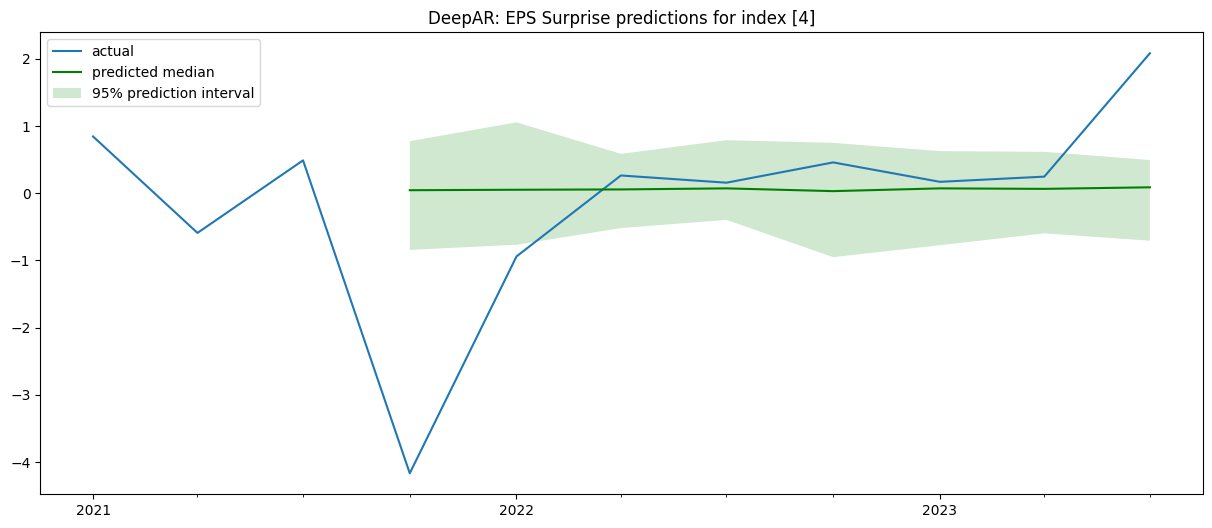

In [ ]:
plot_predictions_by_index(4, forecasts, tests, "DeepAR")

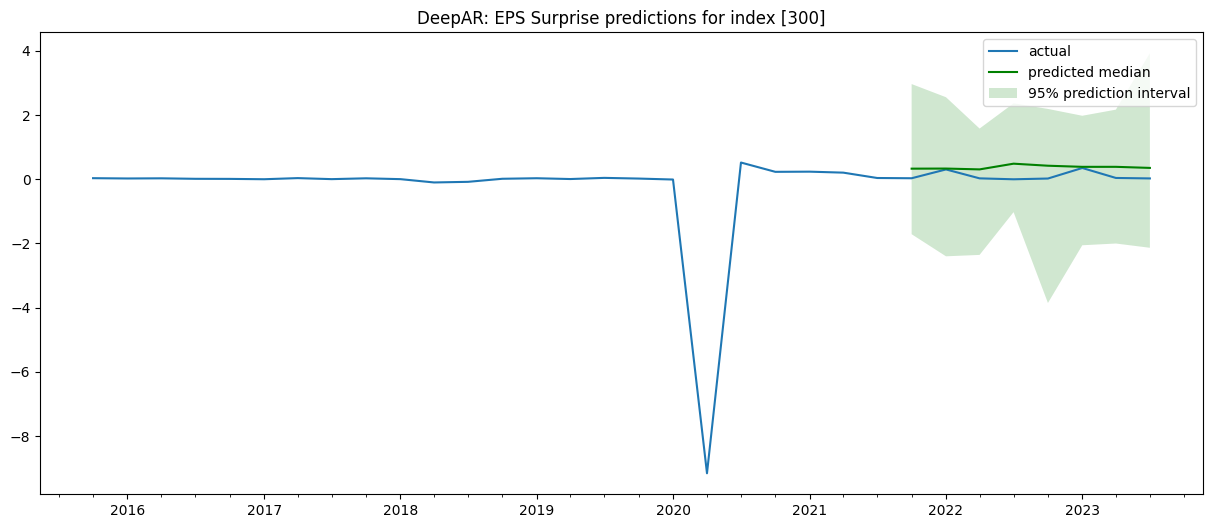

In [ ]:
plot_predictions_by_index(300, forecasts, tests, "DeepAR")

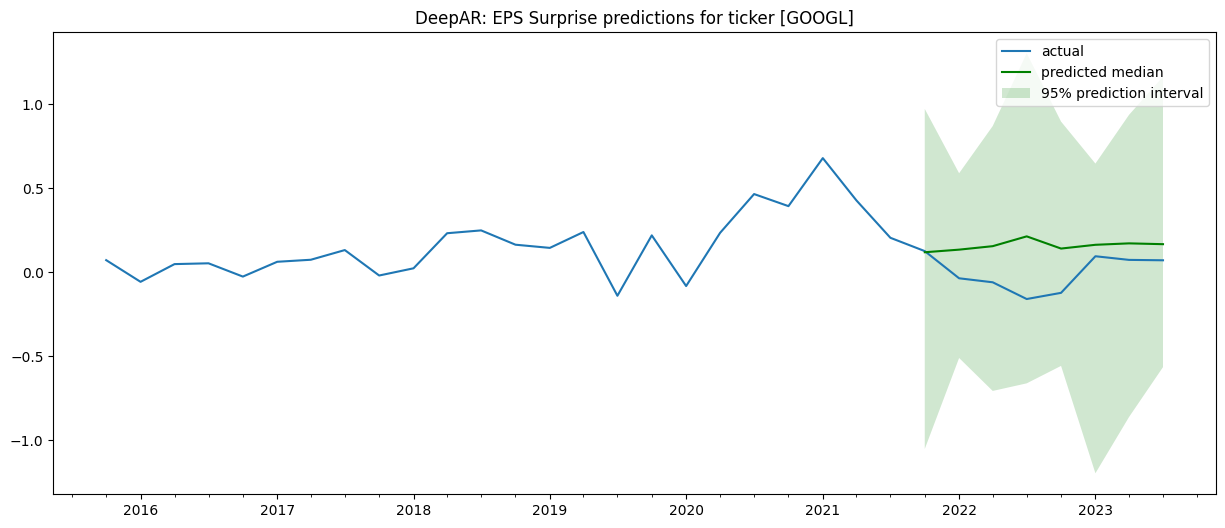

In [ ]:
plot_predictions_by_symbol("GOOGL", forecasts, tests, "DeepAR")

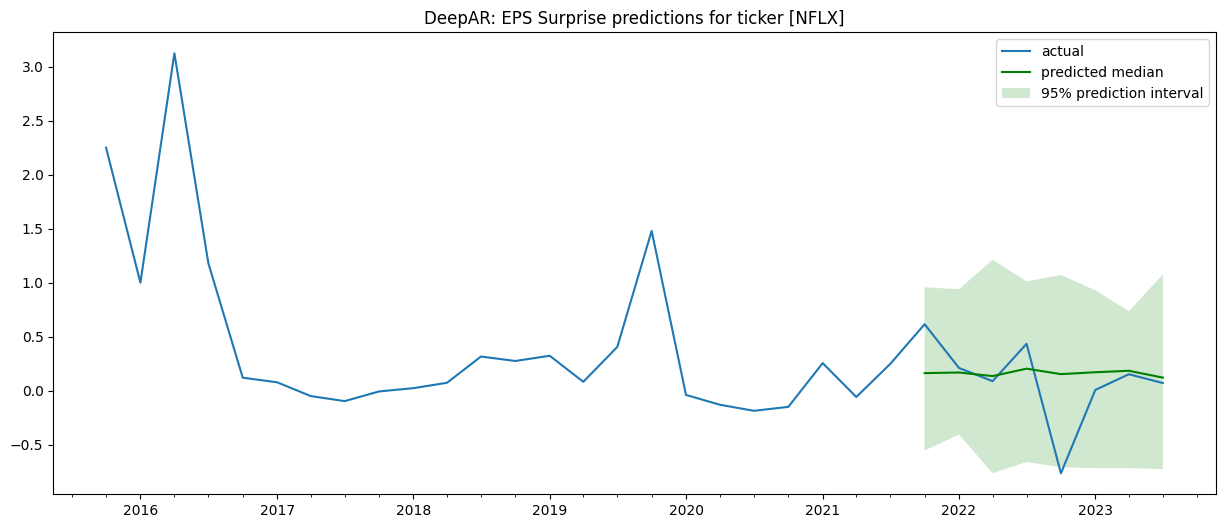

In [ ]:
plot_predictions_by_symbol("NFLX", forecasts, tests, "DeepAR")

## Using Transformers

### Train model

In [ ]:
from gluonts.mx import TransformerEstimator

transformer_predictor = train_estimator(TransformerEstimator, embedding_dimension=8)

100%|██████████| 50/50 [00:04<00:00, 10.65it/s, epoch=20/20, avg_epoch_loss=-0.671]


### Evaluate model on testing data

In [ ]:
forecasts, tests = evaluate_predictions(transformer_predictor)

Running evaluation: 100%|██████████| 498/498 [00:00<00:00, 10560.94it/s]


MSE: 2.7610418477059477
MASE: 1.0631521890860047
MAPE: 10.398734237141673
sMAPE: 1.0668087193781937
MSIS: 19.683955454292825
num_masked_target_values: 1.0
RMSE: 1.6616383023106887
NRMSE: 7.442254373032875


### Visualize model output

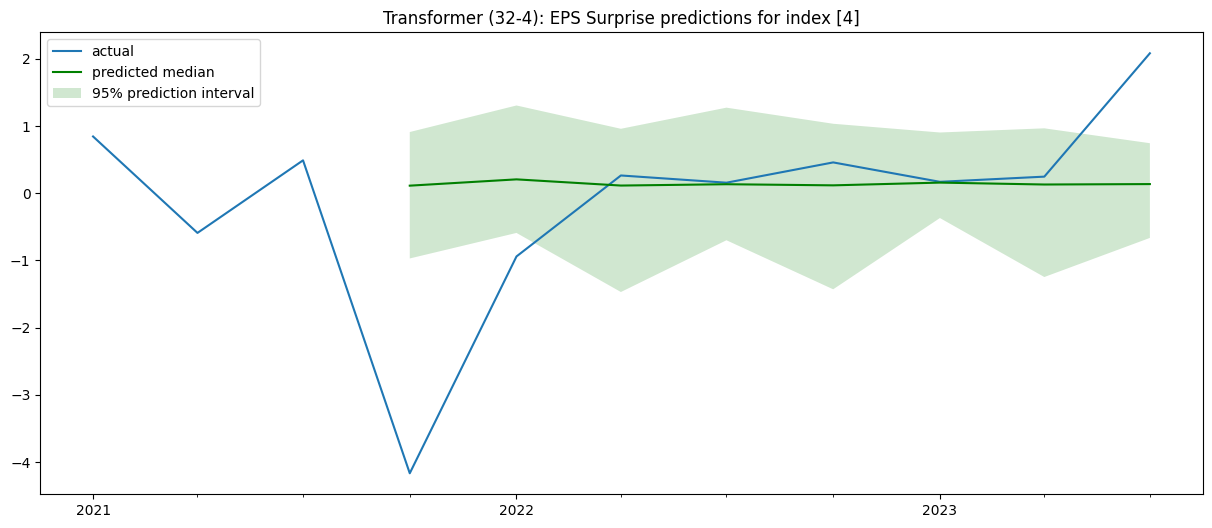

In [ ]:
plot_predictions_by_index(4, forecasts, tests, "Transformer (32-4)")

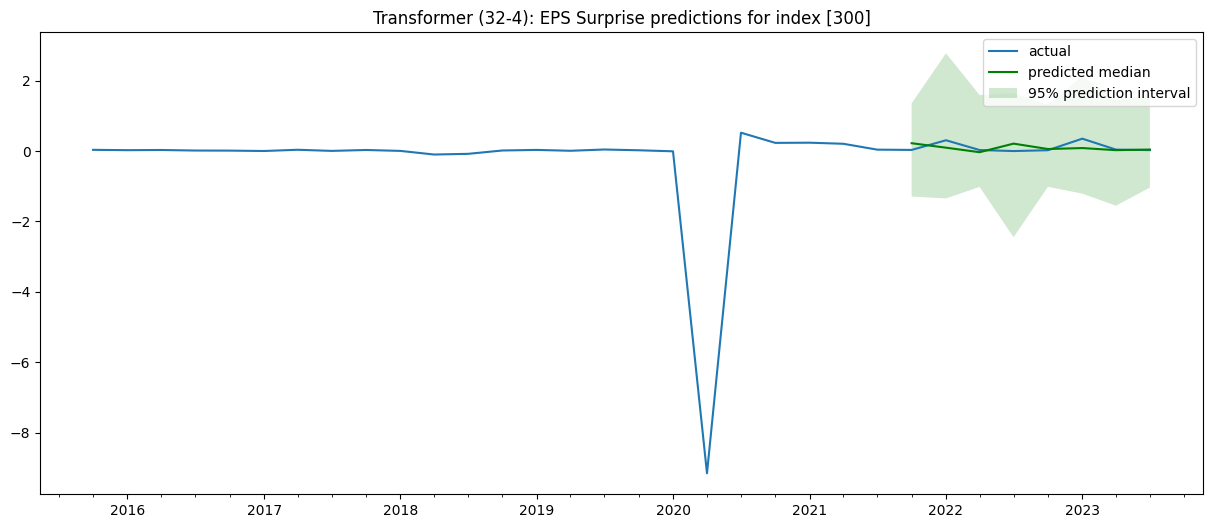

In [ ]:
plot_predictions_by_index(300, forecasts, tests, "Transformer (32-4)")

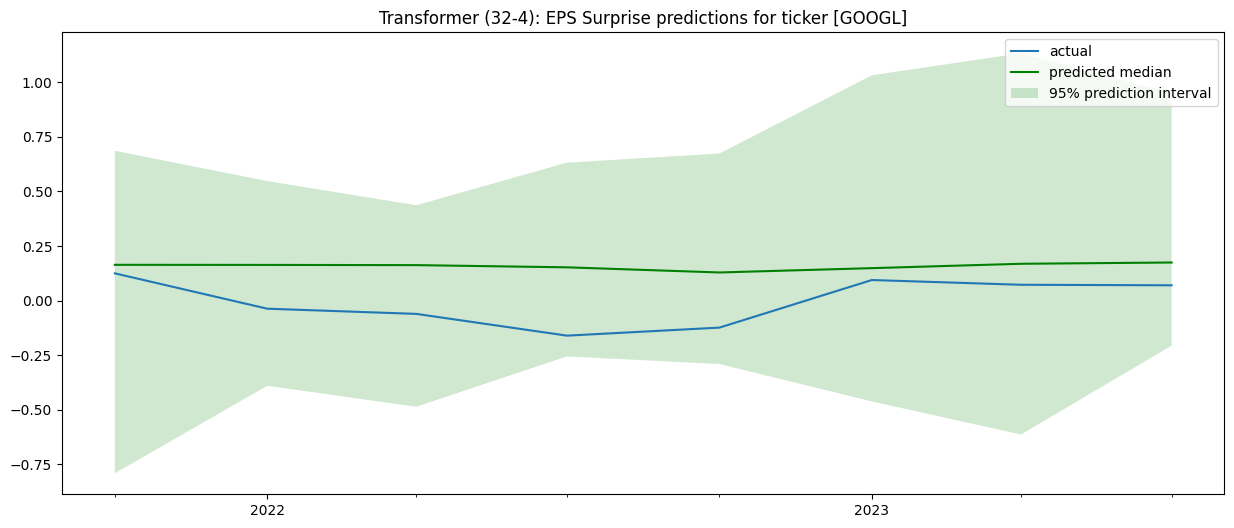

In [ ]:
plot_predictions_by_symbol("GOOGL", forecasts, tests, "Transformer (32-4)")

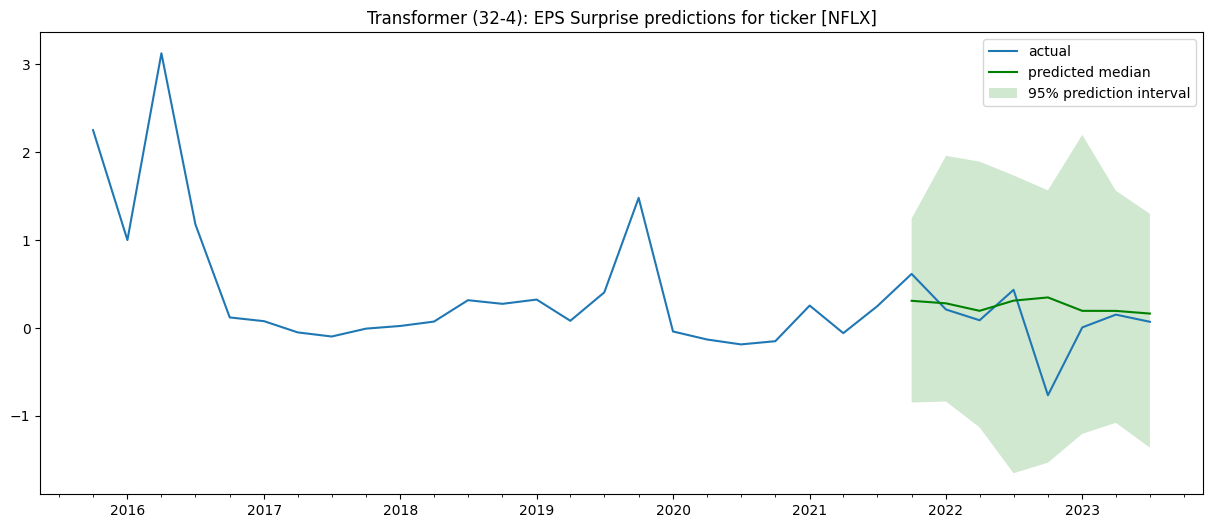

In [ ]:
plot_predictions_by_symbol("NFLX", forecasts, tests, "Transformer (32-4)")